# VGGNet (2014)
Visual Geometry Group (VGG). Hay muchas variantes del VGG: VGG16, VGG19, etc.
El origen es en Oxford University. 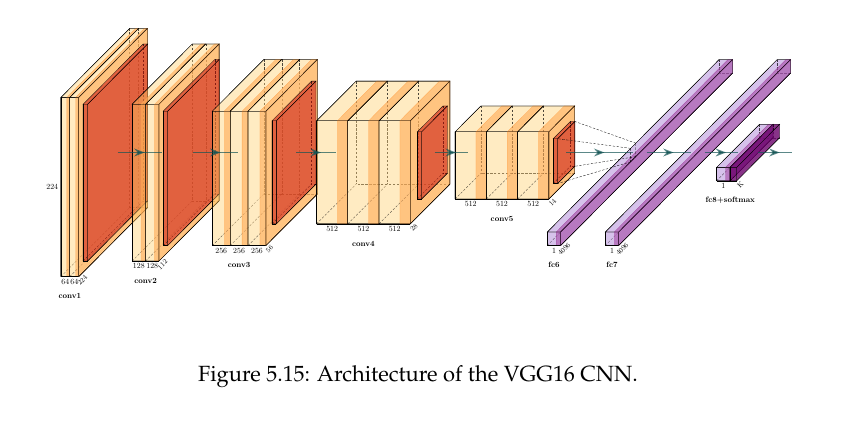

Algunos datos:    
* Gano en el 2014 el concurso de ImageNet con el 92.7%
* Publicada por Karen Simonyan and Andrew Zesserman en el 2015.

## Descripcion:     
* Capa de entrada y  primeras capas convolutivas. La capa de entrada tiene $224 \times 224 \times 3$ y se aploican 64 filtros. Todos los filtros son de 3x3. Hay dos capas.  Hay Maxpooling despues de cada grupo de capas convolutivas.
* Segundo grupo de capas convolutivas: Se usan 128 filtros seguidos de MaxPooling . Hay dos capas
* Tercer grupo de capas convolutivas con 256 filtros seguido de  MaxPooling. Hay tres capas.
* Cuarto grupo de capas convolutivas con 512 filtros. Seguido de MaxPooling. Hay tres capas
* Quinto grupo convolucional. Hay tres capas.
* Flattening a un vector de 4096 compentes (nodos, neuronas).
* Fully connected (densa) de 4096 a 4096 .
* Fully connected layers de 4096 a 17 (el ejemplo de las flores). Con una softmax activation para clasificar.

Los detalles en la implementacion:     



## Implementacion




In [ ]:
# Importar librerias
import tensorflow as tf
tf.__version__

'2.7.0'

In [ ]:
import keras
keras.__version__

'2.7.0'

In [ ]:
# importar mas librerias
!pip install tflearn
from tflearn.datasets import oxflower17
from keras.models import Sequential, Model
# from keras.models import to_categorical
from keras.layers import Conv2D, Dropout, MaxPool2D, Input
from keras.layers import BatchNormalization, Activation, Flatten, Dense



In [ ]:
# load data
X,Y = oxflower17.load_data(one_hot=True)
print(X.shape, Y.shape)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!
(1360, 224, 224, 3) (1360, 17)


In [ ]:
# defininamos una funcion que me compacte el proceso (haga modular)
def vgg_block(layer_in, n_filters, n_conv): 
    for _  in range(n_conv):
        layer_in = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)

    layer_in = MaxPool2D((2,2), strides=(2,2))(layer_in)
    return layer_in


In [ ]:
X.shape[0]

1360

In [ ]:
# Construccion de modelo
model=Sequential()

# primera capa de convoluciones
input_layer = Input(shape=(224,224,3))


X.shape[::]  # no se hacer el subset


layer = vgg_block( input_layer, 64, 2)

# segundo grupo
layer = vgg_block(layer,128, 2)

# tercer grupo
layer = vgg_block(layer, 256, 3)

# cuarto grupo
layer = vgg_block(layer, 512, 3)

# quinto grupo (convolutivo)
layer = vgg_block(layer, 512, 3)

# 1st dense layer
layer = Flatten()(layer)
layer = Dense(4096)(layer)

# Dropout
layer = (Dropout(0.5))(layer)
layer = (Activation('relu'))(layer)

# segunda capa densa
layer=Dense(4096)(layer)

# Otro Dropout
layer=Dropout(0.5)(layer)

# Normalizacion
layer=(BatchNormalization())(layer)
layer=(Activation('relu'))(layer)

# salida categorica en 17 tipos de flores
layer=(Dense(17))(layer)
layer=(Activation('softmax'))(layer)

model = Model(inputs=input_layer, outputs=layer)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     

In [ ]:
# compile model
model.compile(optimizer=tf.keras.optimizers.RMSprop(
    learning_rate=0.001, 
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name='RMSprop',
), loss='categorical_crossentropy', metrics=['accuracy']
)

In [ ]:
# entrenamiento
model.fit( X, Y, batch_size=32, epochs=30, verbose=1, validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/30
1088/1088 [==============================] - ETA: 0s - loss: 3.5969 - acc: 0.0910

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 79s 73ms/sample - loss: 3.5969 - acc: 0.0910 - val_loss: 3.0622 - val_acc: 0.1360
Epoch 2/30
1088/1088 [==============================] - 31s 28ms/sample - loss: 2.9454 - acc: 0.1268 - val_loss: 3.4046 - val_acc: 0.1618
Epoch 3/30
1088/1088 [==============================] - 31s 28ms/sample - loss: 2.9048 - acc: 0.1645 - val_loss: 3.6618 - val_acc: 0.1801
Epoch 4/30
1088/1088 [==============================] - 31s 28ms/sample - loss: 2.6665 - acc: 0.2289 - val_loss: 3.3482 - val_acc: 0.1728
Epoch 5/30
1088/1088 [==============================] - 31s 28ms/sample - loss: 2.5738 - acc: 0.2316 - val_loss: 4.1987 - val_acc: 0.2206
Epoch 6/30
1088/1088 [==============================] - 31s 28ms/sample - loss: 2.4467 - acc: 0.2574 - val_loss: 2.2564 - val_acc: 0.3125
Epoch 7/30
1088/1088 [==============================] - 31s 28ms/sample - loss: 2.1944 - acc: 0.3346 - val_loss: 4.4847 - val_acc: 0.2353
Epoch 8/30
1088/1088 [=======================